In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import datetime as datetime
import math, datetime
from fbprophet import Prophet
from datetime import datetime
from datetime import timedelta


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
btc_cash_price = pd.read_csv('bitcoin_cash_price.csv')
btc_price = pd.read_csv('bitcoin_price.csv', usecols=['Date', 'Close'])
btc_ds = pd.read_csv('bitcoin_dataset.csv')

# bitconnect_price = pd.read_csv('bitconnect_price.csv')
# dash_price = pd.read_csv('dash_price.csv')

ethereum_classic_price = pd.read_csv('ethereum_classic_price.csv')
ethereum_dataset = pd.read_csv('ethereum_dataset.csv')
ethereum_price = pd.read_csv('ethereum_price.csv')

# iota_price = pd.read_csv('iota_price.csv')
litecoin_price = pd.read_csv('litecoin_price.csv')
monero_price = pd.read_csv('monero_price.csv')
# nem_price = pd.read_csv('nem_price.csv')

# neo_price = pd.read_csv('neo_price.csv')
# numeraire_price = pd.read_csv('numeraire_price.csv')
# omisego_price = pd.read_csv('omisego_price.csv')
# qtum_price = pd.read_csv('nem_price.csv')
# ripple_price = pd.read_csv('ripple_price.csv')
# stratis_price = pd.read_csv('stratis_price.csv')
# waves_price = pd.read_csv('waves_price.csv')

In [3]:
btc_price.tail()

,Date,Close
1650,"May 02, 2013",105.21
1651,"May 01, 2013",116.99
1652,"Apr 30, 2013",139.00
1653,"Apr 29, 2013",144.54
1654,"Apr 28, 2013",134.21


In [4]:
# btc_price['Date'] = pd.to_datetime(btc_price['Date'])
# btc_price = btc_price.sort_values('Date')
# btc_price.set_index('Date', inplace=True)

In [5]:
btc_price.columns = ['ds', 'y']

In [6]:
# btc_price['y'] = np.log(btc_price['y'])
# btc_price['cap'] = 15000
# btc_price['floor'] = 100
# future['cap'] = 15000
# future['floor'] = 100

In [7]:
btc_price.dtypes

ds     object
y     float64
dtype: object

In [8]:
# btc_price['ds'] = pd.to_datetime(btc_price['ds'])

# btc_price = btc_price.loc[btc_price['ds'] >= '2017-01-01'].sort_values('ds', axis=0)

In [9]:
m = Prophet()
m.fit(btc_price)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)


In [11]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2013-04-28,757.981280,757.981280,757.981280,-49.047018,451.924464,-548.827591,-548.827591,-548.827591,-548.827591,-548.827591,-548.827591,-1.322335,-1.322335,-1.322335,-547.505256,-547.505256,-547.505256,209.153689
1,2013-04-29,752.793305,752.793305,752.793305,-59.796911,441.515444,-549.024594,-549.024594,-549.024594,-549.024594,-549.024594,-549.024594,3.042394,3.042394,3.042394,-552.066988,-552.066988,-552.066988,203.768711
2,2013-04-30,747.605330,747.605330,747.605330,-56.802233,425.109127,-553.774136,-553.774136,-553.774136,-553.774136,-553.774136,-553.774136,2.634519,2.634519,2.634519,-556.408655,-556.408655,-556.408655,193.831194
3,2013-05-01,742.417355,742.417355,742.417355,-79.669126,434.298198,-564.107075,-564.107075,-564.107075,-564.107075,-564.107075,-564.107075,-3.630421,-3.630421,-3.630421,-560.476654,-560.476654,-560.476654,178.310280
4,2013-05-02,737.229380,737.229380,737.229380,-68.499870,429.650999,-564.702490,-564.702490,-564.702490,-564.702490,-564.702490,-564.702490,-0.489507,-0.489507,-0.489507,-564.212984,-564.212984,-564.212984,172.526890


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2015,2018-11-03,11480.191973,8364.718058,15290.334991
2016,2018-11-04,11495.520719,8275.130379,15175.541934
2017,2018-11-05,11516.739519,8300.482921,15413.439540
2018,2018-11-06,11532.867075,8370.048343,15469.927147
2019,2018-11-07,11542.964058,8312.723374,15368.414017


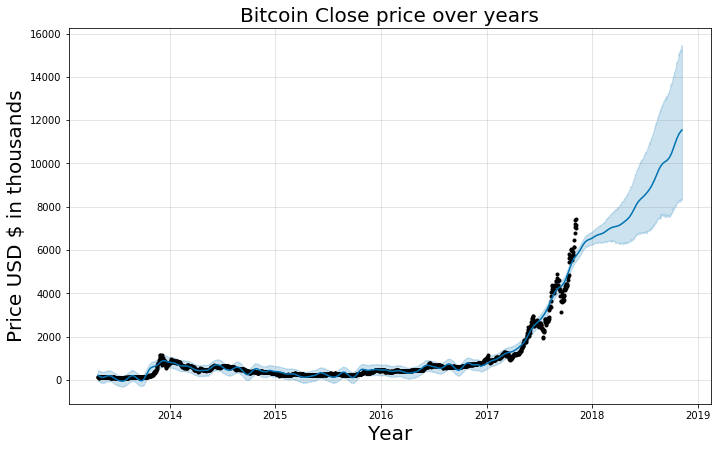

In [13]:
m.plot(forecast);
plt.title("Bitcoin Close price over years",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Price USD $ in thousands",fontsize=20)
plt.show()

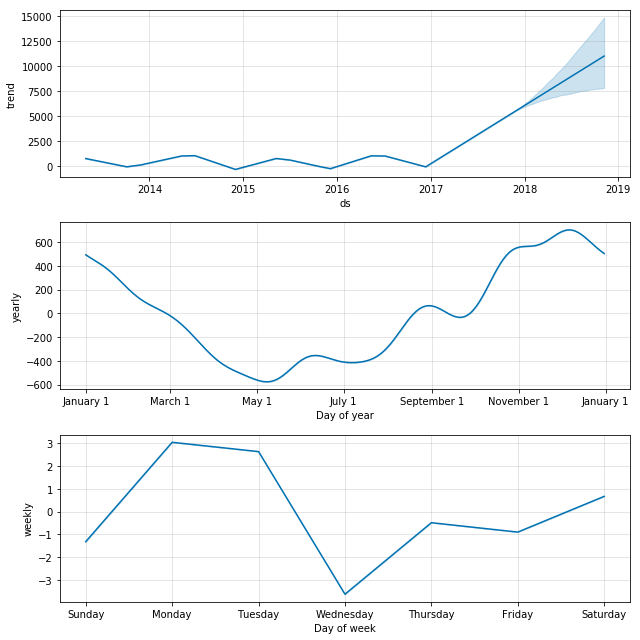

In [14]:
m.plot_components(forecast);
# trend shows that the price of bitcoin stayed steady for several years until 2016.
# the price of BTC trends are cleary visible. The forecast for the next year says that BTC is going to rise about $4000

In [15]:
btc_price['ds'] = pd.to_datetime(btc_price['ds'])
recent = btc_price.loc[btc_price['ds'] >= '2017-01-01'].sort_values('ds', axis=0)

In [16]:
recent.head()

,ds,y
310,2017-01-01,998.33
309,2017-01-02,1021.75
308,2017-01-03,1043.84
307,2017-01-04,1154.73
306,2017-01-05,1013.38


In [17]:
model_recent = Prophet(interval_width=0.95)
model_recent.fit(recent)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future_recent = model_recent.make_future_dataframe(periods=365, freq='D')
forecast_recent = model_recent.predict(future_recent)

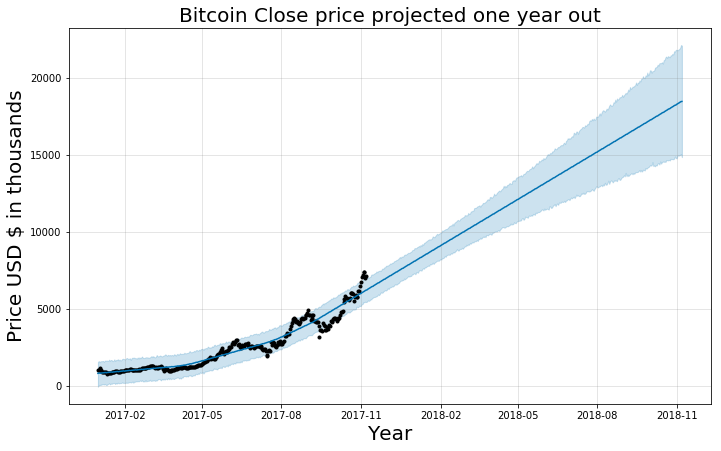

In [19]:
model_recent.plot(forecast_recent);
plt.title("Bitcoin Close price projected one year out",fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Price USD $ in thousands",fontsize=20)
plt.show()

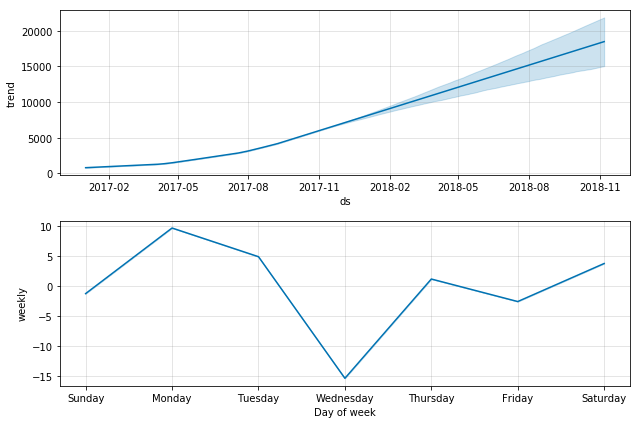

In [20]:
model_recent.plot_components(forecast_recent);

In [21]:
import datetime
forecast_recent[forecast_recent.ds > datetime.datetime.now()]

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
352,2017-12-19,7617.956460,7460.475741,7758.416232,6875.295464,8384.545375,4.856772,4.856772,4.856772,4.856772,4.856772,4.856772,4.856772,4.856772,4.856772,7622.813232
353,2017-12-20,7651.623755,7486.388750,7797.217665,6857.043847,8406.090601,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,7636.195173
354,2017-12-21,7685.291049,7515.377007,7834.999746,6961.429082,8499.877269,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,7686.423704
355,2017-12-22,7718.958344,7543.357039,7874.858656,6913.138817,8523.453899,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,-2.625442,7716.332902
356,2017-12-23,7752.625638,7568.112458,7913.685835,6976.489488,8510.056973,3.722874,3.722874,3.722874,3.722874,3.722874,3.722874,3.722874,3.722874,3.722874,7756.348512
357,2017-12-24,7786.292933,7591.208875,7952.474668,7018.299749,8558.637397,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,-1.300276,7784.992657
358,2017-12-25,7819.960227,7616.689804,7991.263501,7075.194942,8606.091849,9.641999,9.641999,9.641999,9.641999,9.641999,9.641999,9.641999,9.641999,9.641999,7829.602227
359,2017-12-26,7853.627522,7644.599091,8029.623565,7132.988835,8638.943719,4.856772,4.856772,4.856772,4.856772,4.856772,4.856772,4.856772,4.856772,4.856772,7858.484294
360,2017-12-27,7887.294816,7672.684893,8068.679476,7083.710086,8618.711193,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,-15.428582,7871.866235
361,2017-12-28,7920.962111,7700.738036,8105.994277,7135.028241,8679.621443,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,1.132654,7922.094765


In [22]:
from fbprophet.diagnostics import cross_validation

In [23]:
df_cv = cross_validation(m, horizon='180 days')

In [24]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-11-24,671.362540,610.902244,732.609822,376.90,2014-11-23
1,2014-11-25,698.270916,635.011316,756.164203,375.35,2014-11-23
2,2014-11-26,719.396670,663.912183,783.049914,368.37,2014-11-23
3,2014-11-27,736.084429,676.269962,796.253131,369.67,2014-11-23
4,2014-11-28,749.338266,686.920423,808.703005,376.45,2014-11-23


# Trying Pyflux

In [25]:
import pyflux as pf
btc_price['ds'] = pd.to_datetime(btc_price['ds'])
btc_price.set_index('ds',inplace = True)

In [26]:
# btc_returns = pd.DataFrame(btc_returns)
# btc_returns.index = btc_price.ds[1:]
# btc_returns.columns =  ['y']

In [27]:
btc_price.head()

,y
ds,
2017-11-07,7144.38
2017-11-06,7022.76
2017-11-05,7407.41
2017-11-04,7379.95
2017-11-03,7207.76


In [28]:
btc_price = btc_price.reindex(index=btc_price.index[::-1])
yt_values = pd.DataFrame(np.diff(np.log(btc_price['y'].dropna())))
yt_values.index = btc_price.index[1:]
# yt_values.columns = ['Closing BTC Price']

In [29]:
btc_price.head()

,y
ds,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21


In [30]:
yt_values.shape

(1654, 1)

In [31]:
yt_values.head()

,0
ds,
2013-04-29,0.074151
2013-04-30,-0.039082
2013-05-01,-0.172385
2013-05-02,-0.106130
2013-05-03,-0.073545


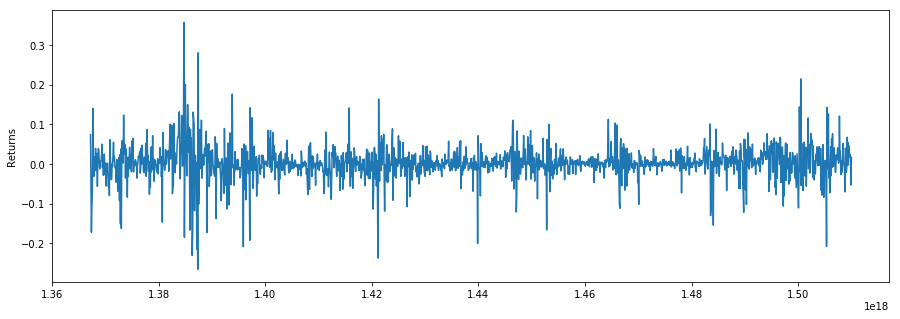

In [32]:
plt.figure(figsize=(15,5))
plt.ylabel('Returns')
plt.plot(yt_values)
plt.show()

In [33]:
my_model = pf.GARCH(p=1,q=1, data=yt_values)
print(my_model.latent_variables)

my_model.adjust_prior(1, pf.TruncatedNormal(0.01, 0.5, lower=0.0, upper=1.0))
my_model.adjust_prior(2, pf.TruncatedNormal(0.97, 0.5, lower=0.0, upper=1.0))

Index    Latent Variable           Prior           Prior Hyperparameters     V.I. Dist  Transform 
======== ========================= =============== ========================= ========== ==========
0        Vol Constant              Normal          mu0: 0, sigma0: 3         Normal     exp       
1        q(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
2        p(1)                      Normal          mu0: 0, sigma0: 0.5       Normal     logit     
3        Returns Constant          Normal          mu0: 0, sigma0: 3         Normal     None      


In [34]:
my_model.fit('M-H', nsims=20000)

Acceptance rate of Metropolis-Hastings is 0.000325
Acceptance rate of Metropolis-Hastings is 0.0013
Acceptance rate of Metropolis-Hastings is 0.054325
Acceptance rate of Metropolis-Hastings is 0.186975
Acceptance rate of Metropolis-Hastings is 0.249275

Tuning complete! Now sampling.
Acceptance rate of Metropolis-Hastings is 0.2349375


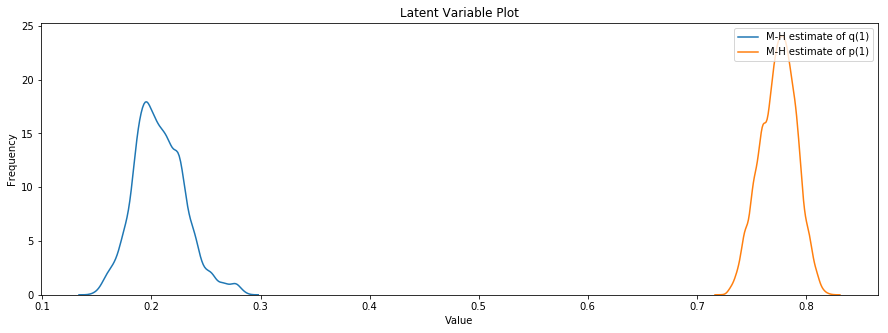

In [35]:
my_model.plot_z([1,2])

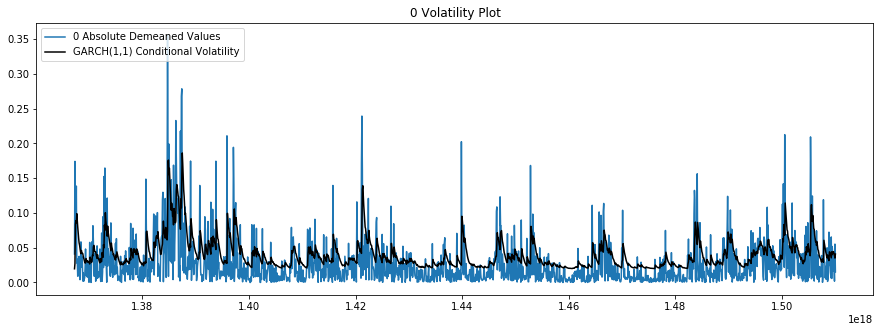

In [36]:
my_model.plot_fit(figsize=(15,5))

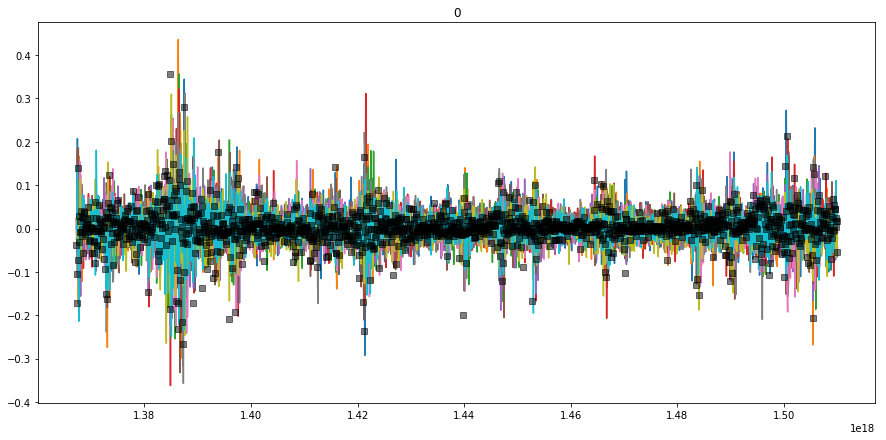

In [37]:
my_model.plot_sample(nsims=10, figsize=(15,7))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

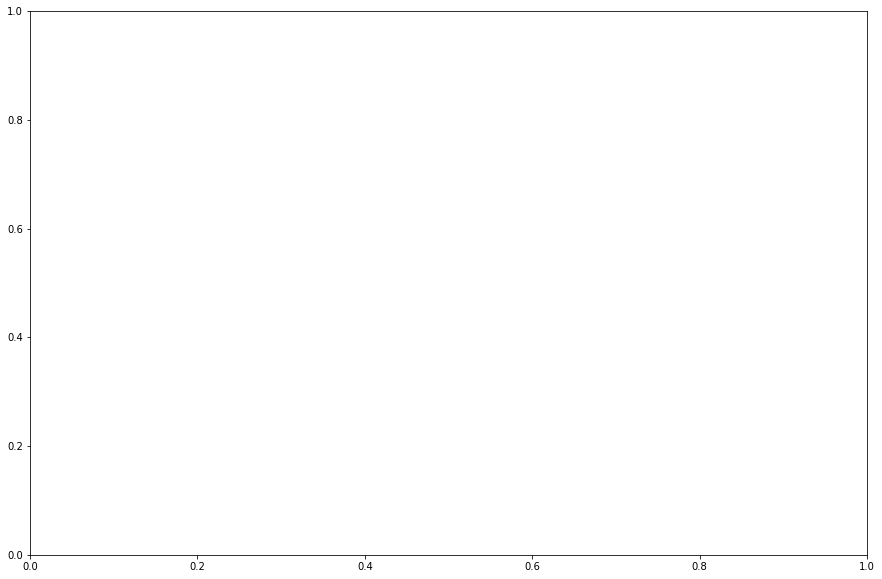

In [38]:
my_model.plot_predict(h=365, figsize=(15,10))